In [14]:
import importlib
import itertools
import torch
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F

from utils import layers, hooking, img, stats, models, losses, shift
from stepping import loss, closure

In [19]:
importlib.reload(models)
vgg = models.vgg19()

In [20]:
vgg

Sequential(
  (0): Normalization()
  (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): ReLU(inplace)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16): ReLU(inplace)
  (17): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU(inplace)
  (19): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (20): Conv2d(256, 512, kernel_si

In [21]:
hooker = hooking.Hooker(vgg)
hooker.attach_hooks("texture_hooks", [10])
hook_bag = hooker.get_bag()
vgg = layers.clipped_model(vgg, hooker.last_hooked_index())

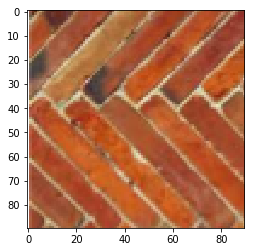

In [22]:
transform = transforms.Compose([
    transforms.RandomCrop(90),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/bricks.png", transform)
img.show_image(example_texture)

In [23]:
importlib.reload(losses)
importlib.reload(stats)
importlib.reload(shift)


vgg(example_texture)
target = stats.extract_features(hook_bag.get_hook("texture_hooks"), stats.deep_correlation_matrix)

number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154
number of tensors stored in memory: 154


In [24]:
dcorr_loss = loss.LossFn(target, hook_bag.get_hook("texture_hooks"), losses.deep_correlation_loss) 

In [25]:
collector = loss.LossCollector()
collector.add_loss_fn("texture", dcorr_loss)

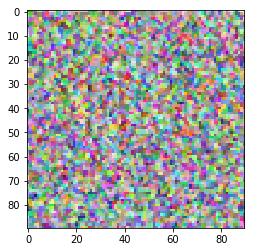

In [26]:
sample_texture = img.random_image(2, 90)
img.show_image(sample_texture)

inputs = {
    "input": sample_texture,
    "loss_name": "texture",
    "pyramid": False,
}

optimizer = optim.LBFGS([sample_texture], history_size=2)

In [27]:
stepper = closure.Stepper(inputs, vgg, collector, optimizer)

In [28]:
importlib.reload(stats)
importlib.reload(losses)

show_at = 1
for i in range(30):
    optimizer.step(stepper.loss_fn)
    
    img.save_image(sample_texture, "data/synth/lol{}.jpg".format(i))
    print(sample_texture.grad[0][0][0][:3])

number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 155
number of tensors stored in memory: 162
number of tensors stored in memory: 162
number of tensors stored in memory: 162
number of tensors stored in memory: 162
number of tensors stored in memory: 162
number of tensors stored in memory: 162
number of tensors stored in memory: 162
number of tensors stored in memory: 162


number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173
number of tensors stored in memory: 173


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
tensor([-0.0003, -0.0004, -0.0016], device='cuda:0')
number of tensors stored in memory: 166
number of tensors stored in

number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
tensor([-0.0005, -0.0007,  0.0002], device='cuda:0')
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in memory: 166
number of tensors stored in

number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175
number of tensors stored in memory: 175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


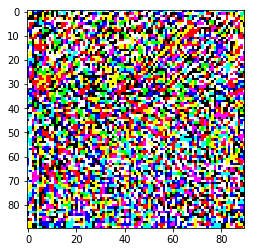

In [29]:
img.show_image(sample_texture)